 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [113]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
##added
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [114]:
# Reading whale returns
whale_returns = pd.read_csv('resources/whale_returns.csv', parse_dates = True, infer_datetime_format = True, index_col="Date")

C:\Users\chris\AppData\Local\Temp\ipykernel_18112\2299673088.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv('resources/whale_returns.csv', parse_dates = True, infer_datetime_format = True, index_col="Date")


In [115]:
### check contents of dataframe
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [116]:
# Count nulls
whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [117]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [118]:
# Drop nulls
whale_returns = whale_returns.dropna()

In [119]:
### Checking for nulls again
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [120]:
### check contents of dataframe
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [121]:
# Reading algorithmic returns
algorithmic_returns = pd.read_csv('resources/algo_returns.csv', parse_dates = True, infer_datetime_format = True, index_col="Date")

C:\Users\chris\AppData\Local\Temp\ipykernel_18112\28387038.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algorithmic_returns = pd.read_csv('resources/algo_returns.csv', parse_dates = True, infer_datetime_format = True, index_col="Date")


In [122]:
# Count nulls
algorithmic_returns.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [123]:
# Drop nulls
algorithmic_returns = algorithmic_returns.dropna()

In [124]:
### Check for nulls again
algorithmic_returns.isnull().mean() * 100

Algo 1    0.0
Algo 2    0.0
dtype: float64

In [147]:
### check contents of dateframe
algorithmic_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [126]:
# Reading S&P 500 Closing Prices
sp500_historic_closing = pd.read_csv('Resources/sp500_history.csv', parse_dates = True, infer_datetime_format = True)

###Using pd.to_datetime
sp500_historic_closing['Date'] = pd.to_datetime(sp500_historic_closing['Date'])
sp500_historic_closing.set_index('Date', inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_18112\281040866.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_historic_closing = pd.read_csv('Resources/sp500_history.csv', parse_dates = True, infer_datetime_format = True)
C:\Users\chris\AppData\Local\Temp\ipykernel_18112\281040866.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_historic_closing['Date'] = pd.to_datetime(sp500_historic_closing['Date'])


In [127]:
### check contents of dataframe
sp500_historic_closing

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [128]:
### Sort values
sp500_historic_closing.sort_values(['Date'], ascending=True,inplace=True)
sp500_historic_closing

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [129]:
# Check Data Types
sp500_historic_closing['Close'].dtype

dtype('O')

In [130]:
# Fix Data Types
sp500_historic_closing['Close'] = sp500_historic_closing['Close'].str.replace('$', '')
sp500_historic_closing['Close'] = sp500_historic_closing['Close'].astype(float)
### check contents of dataframe
sp500_historic_closing

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [131]:
### check data type of column 'Close' dataframe
sp500_historic_closing['Close'].dtype

dtype('float64')

In [132]:
# Calculate Daily Returns
### below code commented out removed as it did not return a dataframe
# sp500_daily_returns = sp500_historic_closing['Close'].pct_change()
sp500_daily_returns = sp500_historic_closing.pct_change()

In [133]:
### check if percent change applied to column 'close'
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [134]:
### Check for nulls
sp500_daily_returns.isnull().mean() * 100

Close    0.060643
dtype: float64

In [135]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()

In [136]:
### Check for nulls again
sp500_daily_returns.isnull().mean() * 100
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [137]:
### Check dataframe content
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [138]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['S&P 500 Close']
sp500_daily_returns.head()

,S&P 500 Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [139]:
### locate first matching value for daily_returns on date 2015-03-3
sp500_daily_returns.loc['2015-03-03']

S&P 500 Close   -0.004539
Name: 2015-03-03 00:00:00, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [148]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combinedreturns_df = pd.concat([whale_returns, algorithmic_returns, sp500_daily_returns], axis='columns',join='inner')

In [150]:
### Check dataframe content
combinedreturns_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


In [170]:
### no longer needed
### Change column name of S&P500 daily returns for readiblity/comparsion
combinedreturns_df.columns=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P TSX']

In [171]:
### Show combinedreturns_df content
combinedreturns_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

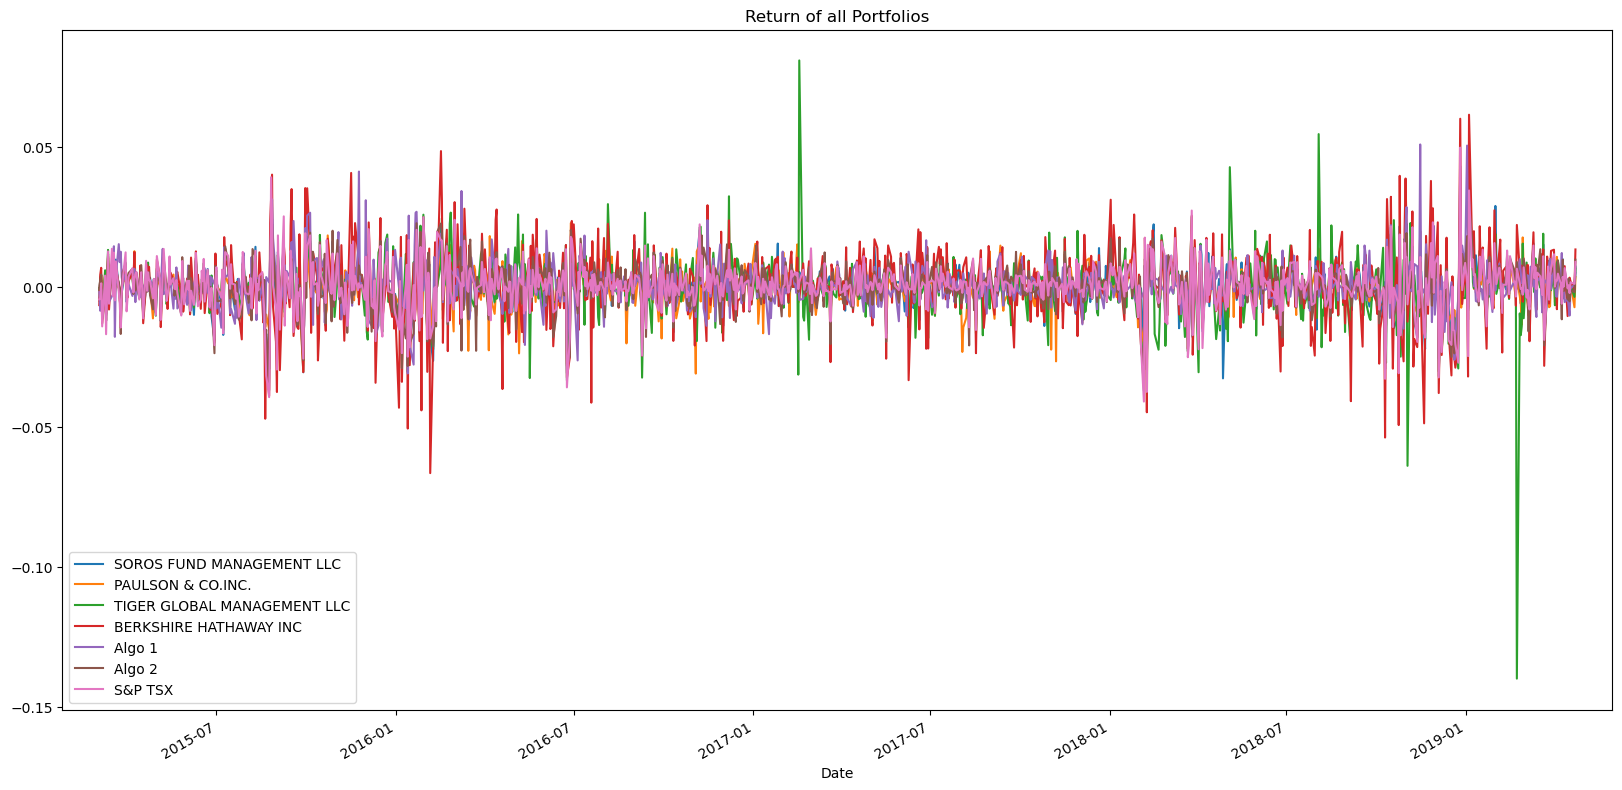

In [172]:
# Plot daily returns of all portfolios
combinedreturns_df.plot(figsize=(20,10), title="Return of all Portfolios").margins(x=0.025)

#### Calculate and Plot cumulative returns.

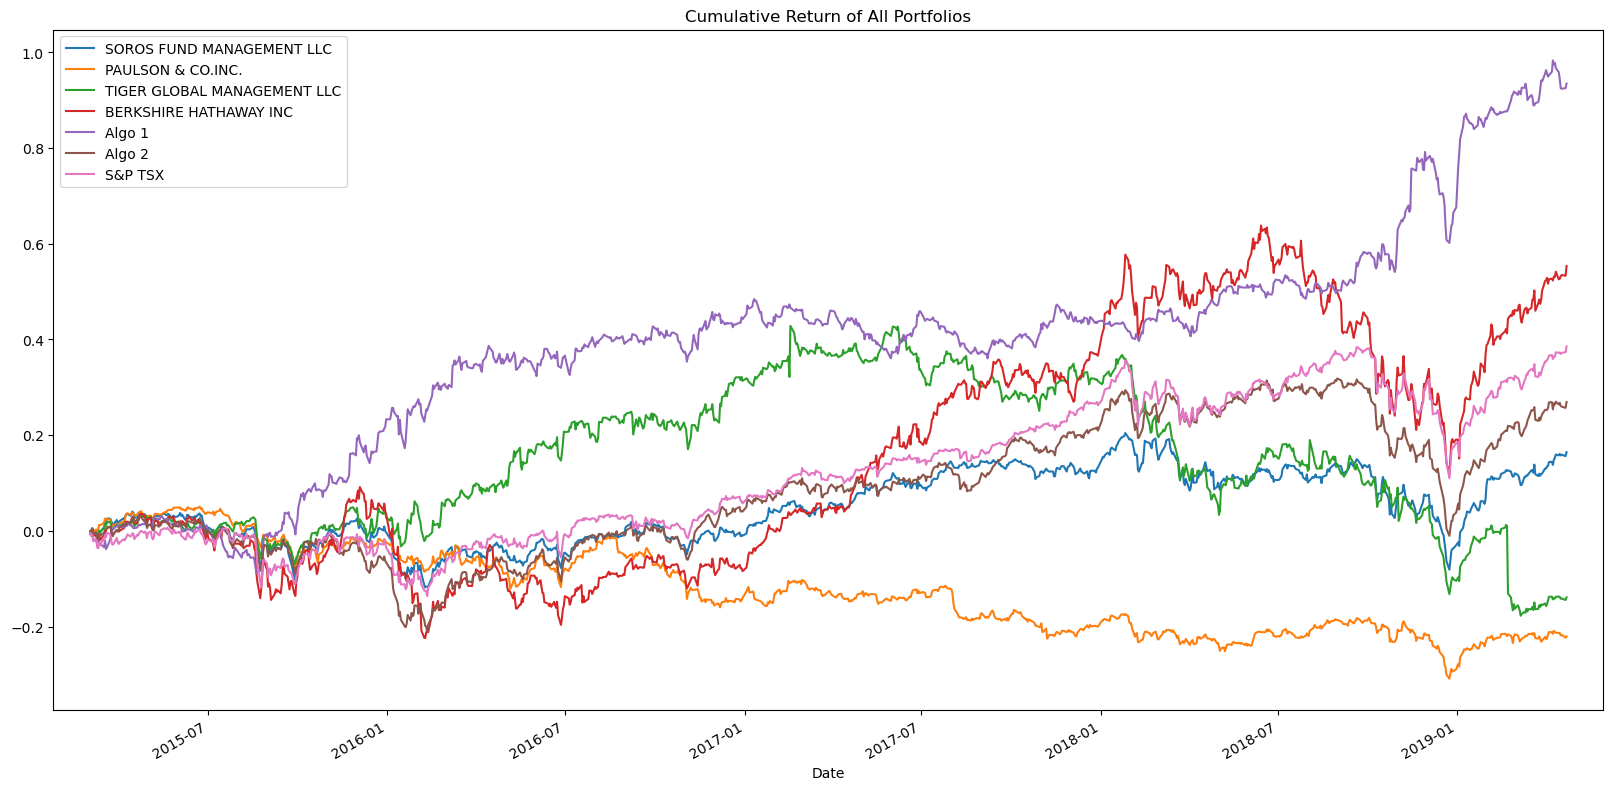

In [173]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combinedreturns_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize= (20,10), title="Cumulative Return of All Portfolios").margins(x=0.025)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

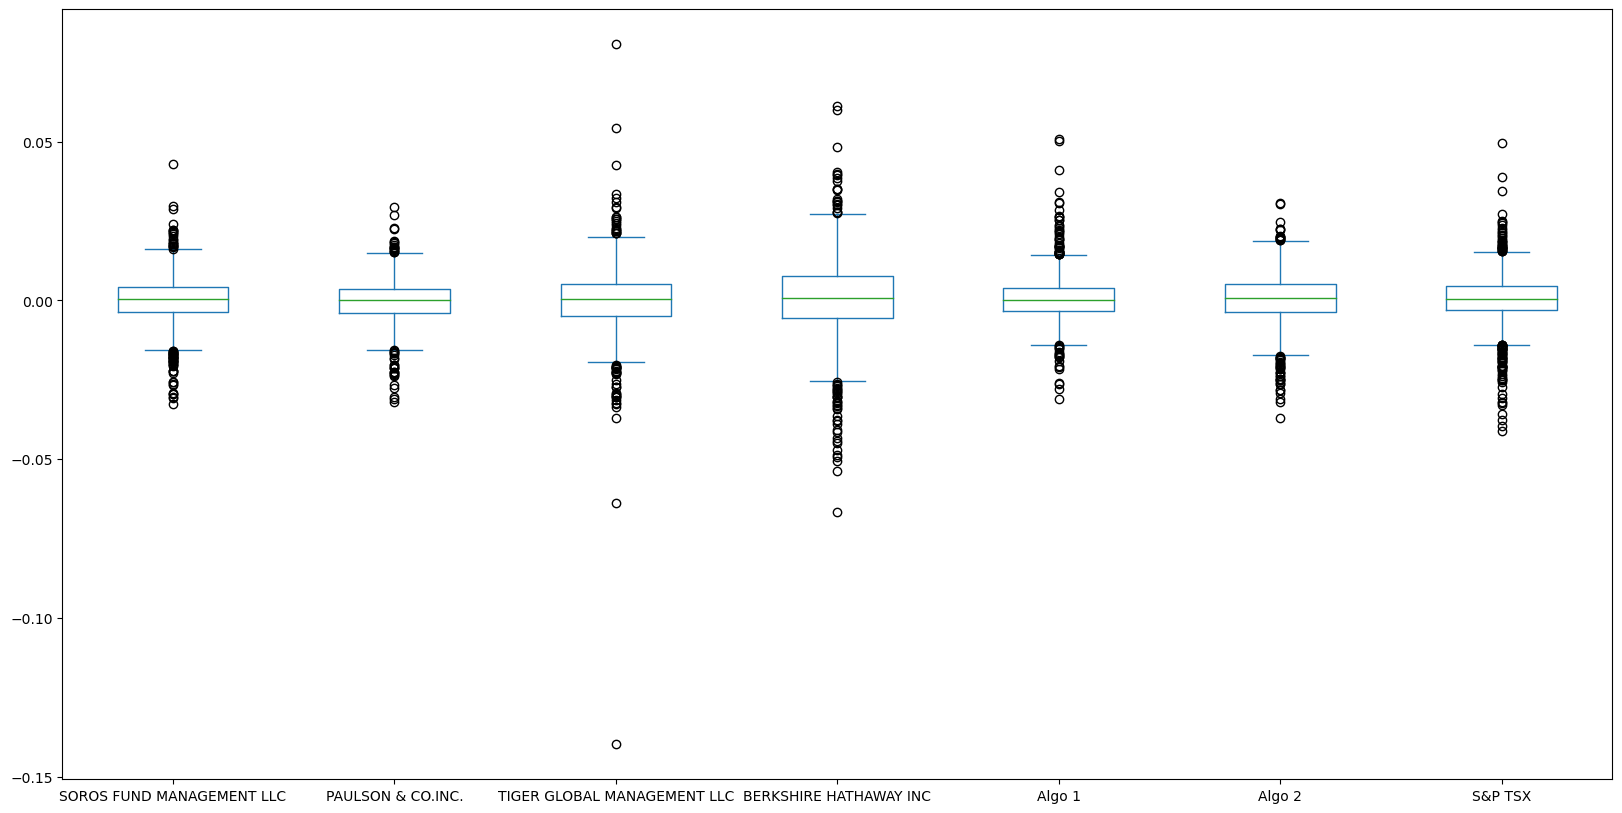

In [174]:
### Cumulative plot box
### accidently used cumulative_returns in prior submission, below code is correct with combinedreturns_df
combinedreturns_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [175]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns_std = combinedreturns_df.std()
cumulative_returns_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P TSX                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [176]:
# Calculate the daily standard deviation of S&P 500
print(f'The standard deviation of the S&P 500 is {round(cumulative_returns_std[6] * 100 ,2) }%.')

The standard deviation of the S&P 500 is 0.86%.


C:\Users\chris\AppData\Local\Temp\ipykernel_18112\4093641005.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The standard deviation of the S&P 500 is {round(cumulative_returns_std[6] * 100 ,2) }%.')


In [177]:
# Determine which portfolios are riskier than the S&P 500
sp500_std = cumulative_returns_std['S&P TSX']
index = 0
for std in cumulative_returns_std:
    if (std > sp500_std):
        print(f"The {cumulative_returns_std.index[index]} portfolio has more risk than the S&P.")
    elif std < sp500_std:
        print(f"The {cumulative_returns_std.index[index]} portfolio has less risk than the S&P.")
    elif cumulative_returns_std.index[index] == cumulative_returns_std.index[index]:
        pass
    else:
        print(f"The {cumulative_returns_std.index[index]} portfolio has the same risk as the S&P.")
    index += 1

The SOROS FUND MANAGEMENT LLC portfolio has less risk than the S&P.
The PAULSON & CO.INC. portfolio has less risk than the S&P.
The TIGER GLOBAL MANAGEMENT LLC portfolio has more risk than the S&P.
The BERKSHIRE HATHAWAY INC portfolio has more risk than the S&P.
The Algo 1 portfolio has less risk than the S&P.
The Algo 2 portfolio has less risk than the S&P.


### Calculate the Annualized Standard Deviation

In [179]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = cumulative_returns_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P TSX                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

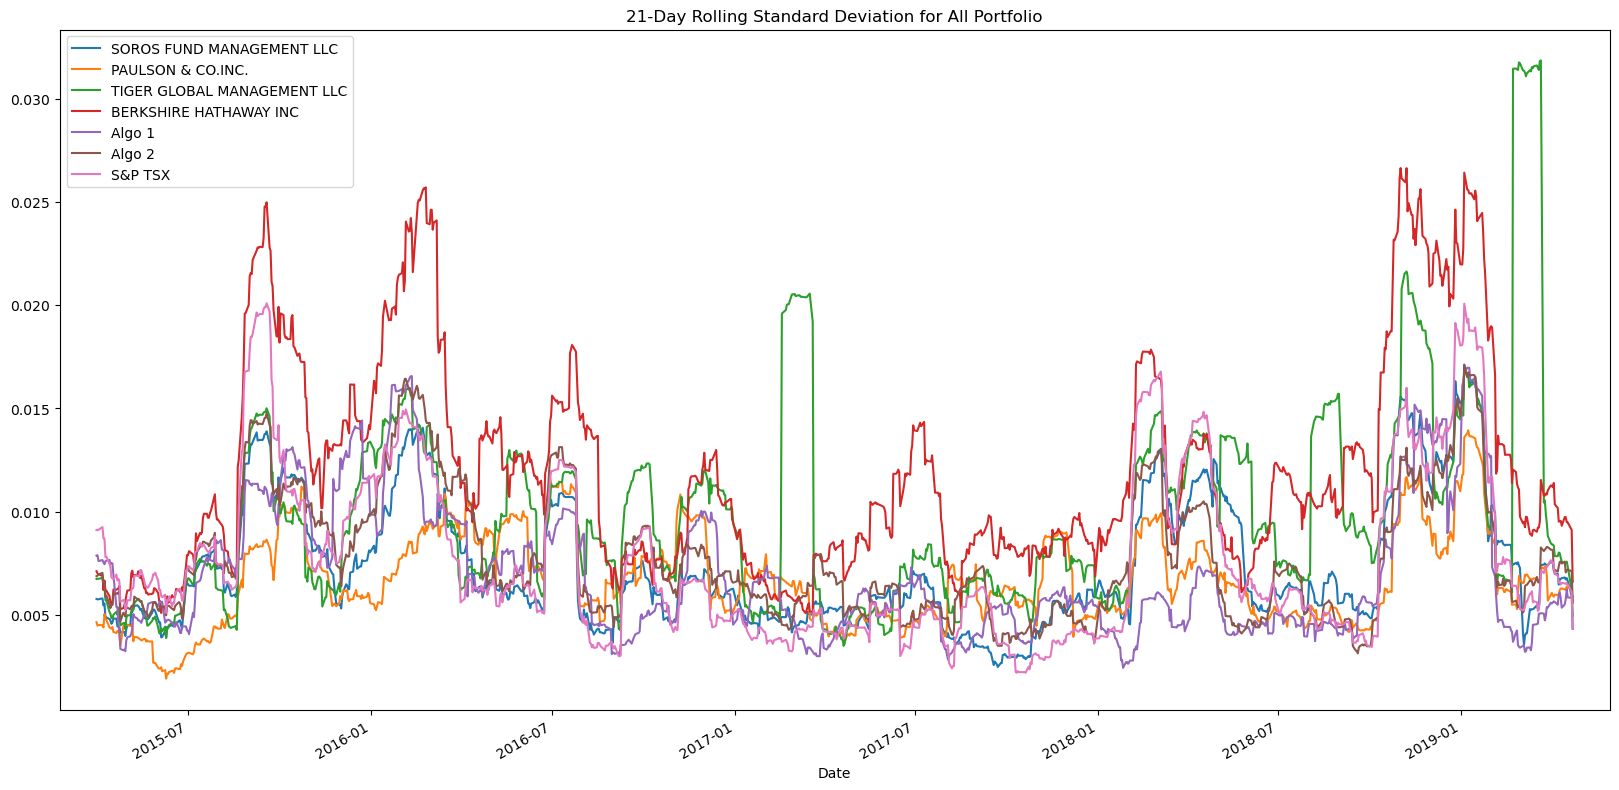

In [182]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combinedreturns_df.rolling(window=21).std().plot(figsize=(20,10), title='21-Day Rolling Standard Deviation for All Portfolio').margins(x=0.025)

### Calculate and plot the correlation

<Axes: >

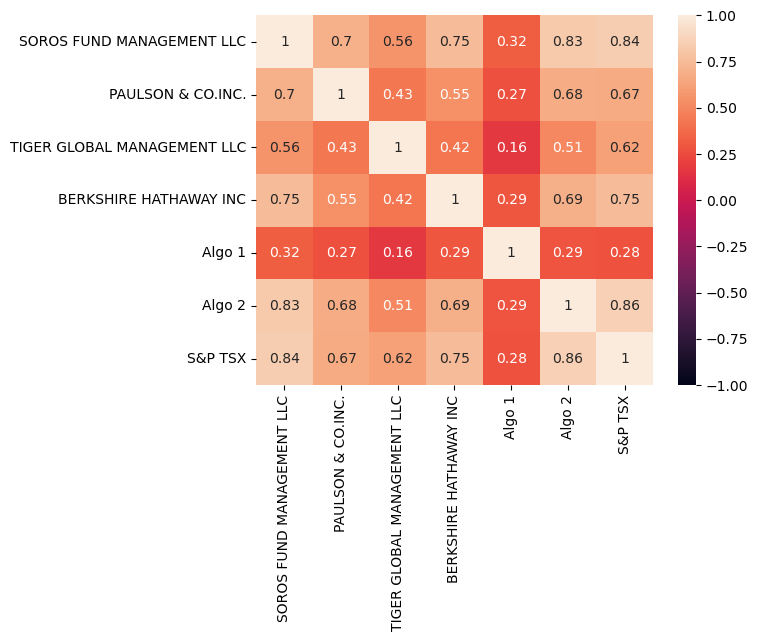

In [205]:
# Calculate the correlation
correlation = combinedreturns_df.corr()
# Display the correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [206]:
# Calculate covariance of a single portfolio
### cumulative_returns was used in previous code, corrected by using combinedreturns_df
rolling_covariance = combinedreturns_df['Algo 2'].rolling(window=21).cov(combinedreturns_df['S&P TSX'])

In [207]:
# Calculate variance of S&P 500
### cumulative_returns was used in previous code, corrected by using combinedreturns_df
rolling_variance = combinedreturns_df['S&P TSX'].rolling(window=21).var()

In [208]:
# Computing beta
rolling_beta = rolling_covariance/rolling_variance

<Axes: title={'center': '21-Day Rolling Beta of Algo 2 compared to the S&P 500'}, xlabel='Date'>

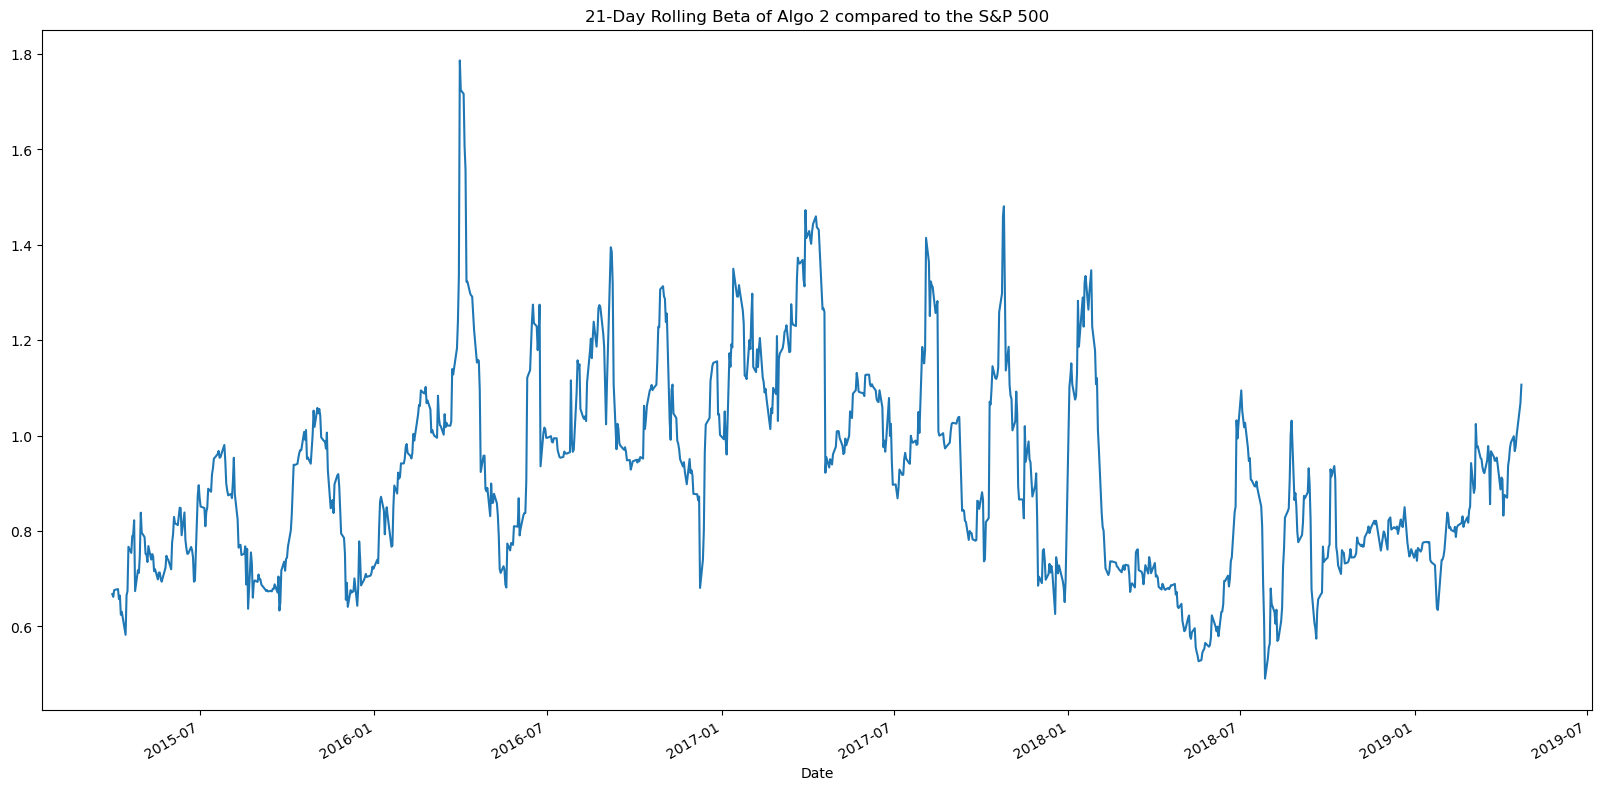

In [209]:

# Plot beta trend
rolling_beta.plot(figsize=(20,10), title="21-Day Rolling Beta of Algo 2 compared to the S&P 500")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [210]:
# Use `ewm` to calculate the rolling window
### Challege: Calculate the Exponentially Weighted Average for all portfolios using a 21-day half-life
### This is like a moving window average, but it assigns greater importance to more recent observations.
ewm_df = combinedreturns_df.ewm(halflife=21).std()
ewm_df.dropna(inplace=True)
ewm_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.008454
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


<Axes: title={'center': 'Exponentially Weighted Average Challenge: 21-Day Rolling Standard Deviation for All Portfolio'}, xlabel='Date'>

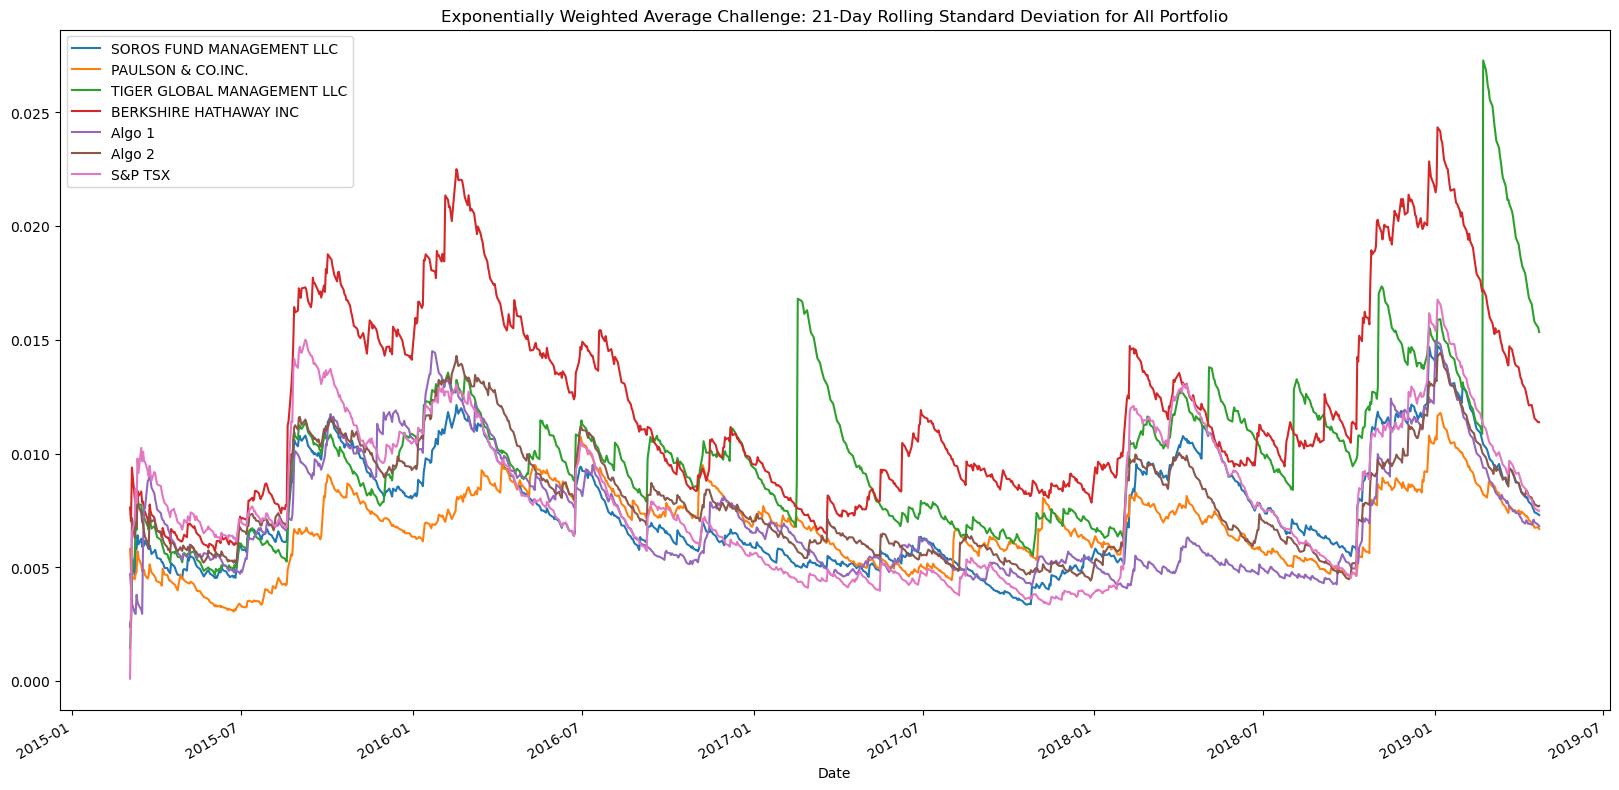

In [217]:
# Use `ewm` to calculate the rolling window
### Challege: Calculate the Exponentially Weighted Average for all portfolios using a 21-day half-life
### This is like a moving window average, but it assigns greater importance to more recent observations.
### old previous code below
### ewm_df.ewm(halflife=21).std().plot(figsize=(10,10), title='Exponentially Weighted Average Challenge: 21-Day Rolling Standard Deviation for All Portfolio')
ewm_df.plot(figsize=(20,10), title='Exponentially Weighted Average Challenge: 21-Day Rolling Standard Deviation for All Portfolio')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [221]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combinedreturns_df.mean() * 252)) / (combinedreturns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P TSX                        0.648267
dtype: float64

<Axes: title={'center': 'Sharp Ratios of Daily Returns of Multiple Portfolios'}>

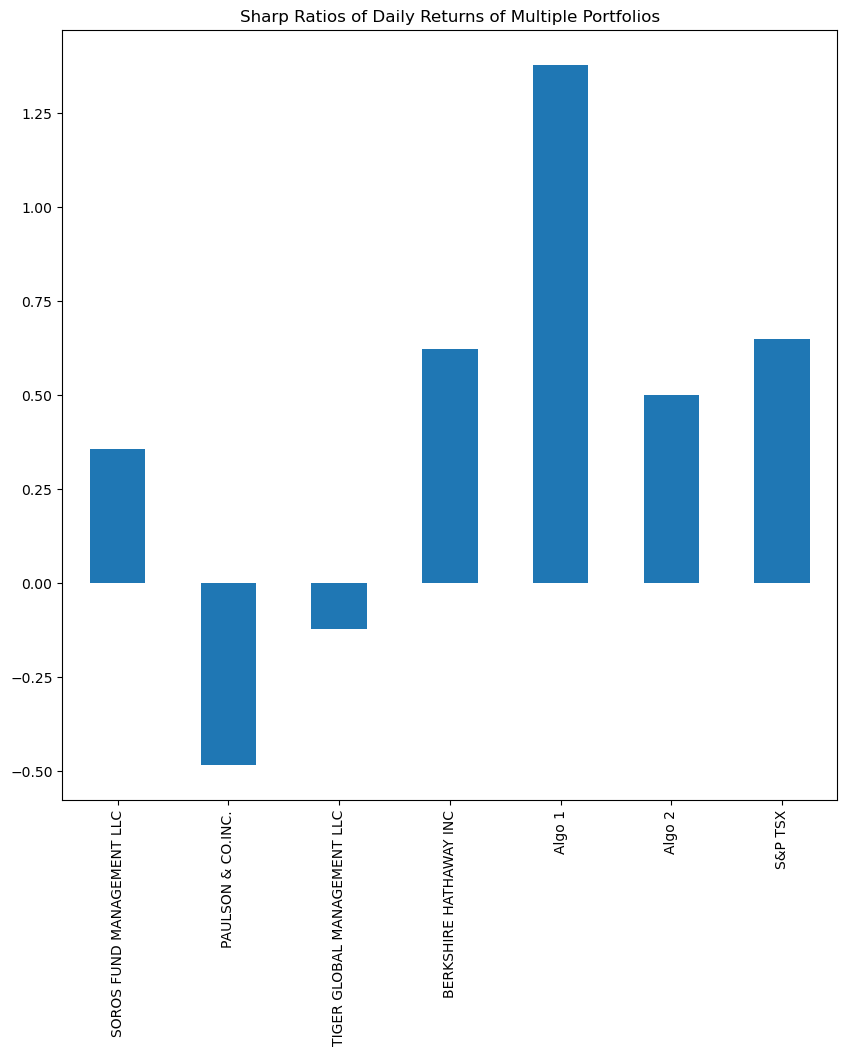

In [222]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(10,10),kind='bar', title= "Sharp Ratios of Daily Returns of Multiple Portfolios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [327]:
#The alogrithmic strategies do wel! The 1st alogrithmic strategy outperforms both the S&P 500 and the whale portfolios! 
#The 2nd alogrithmic does well to compete with the S&P 500 and the whale portfolios, but doesn't outperform them!
print(f"Algorithm 2 statistics\n")    
index=0
algo2 = sharpe_ratios['Algo 2']

for sharpe in sharpe_ratios:
    if sharpe_ratios.index[index] == 'Algo 2':
        continue
    if sharpe < algo2:
        print(f"The {sharpe_ratios.index[index]} portfolio was outperformed by the Algo 2 portfolio")
    elif sharpe > algo2:
        print(f"The {sharpe_ratios.index[index]} portfolio outperformed the Algo 2 portfolio")
    else:
        print(f"The {sharpe_ratios.index[index]} portfolio and the Algo 2 portfolio performed equally")
    index+=1

print("")
print("Algorithm 1 statistics")    
index=0
algo1 = sharpe_ratios['Algo 1']

for sharpe in sharpe_ratios:
    if sharpe_ratios.index[index] == 'Algo 1':
        continue
    if sharpe < algo1:
        print(f"The {sharpe_ratios.index[index]} portfolio was outperformed by the Algo 1 portfolio")
    elif sharpe > algo1:
        print(f"The {sharpe_ratios.index[index]} portfolio outperformed the Algo 1 portfolio")
    else:
        print(f"The {sharpe_ratios.index[index]} portfolio and the Algo 1 portfolio performed equally")
    index+=1

Algorithm 2 statistics

The SOROS FUND MANAGEMENT LLC portfolio outperformed the Algo 2 portfolio
The PAULSON & CO.INC. portfolio outperformed the Algo 2 portfolio
The TIGER GLOBAL MANAGEMENT LLC portfolio was outperformed by the Algo 2 portfolio
The BERKSHIRE HATHAWAY INC portfolio outperformed the Algo 2 portfolio
The Algo 1 portfolio outperformed the Algo 2 portfolio

Algorithm 1 statistics
The SOROS FUND MANAGEMENT LLC portfolio was outperformed by the Algo 1 portfolio
The PAULSON & CO.INC. portfolio was outperformed by the Algo 1 portfolio
The TIGER GLOBAL MANAGEMENT LLC portfolio was outperformed by the Algo 1 portfolio
The BERKSHIRE HATHAWAY INC portfolio was outperformed by the Algo 1 portfolio


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [233]:
# Reading data from 1st stock
appl_historic_returns = pd.read_csv('resources/aapl_historical.csv', parse_dates = True, infer_datetime_format = True, index_col='Trade DATE')

### dropped Symbol column and renamed column to ticker symbol
appl_historic_returns.drop(columns=['Symbol'], inplace=True)
appl_historic_returns.columns = ['AAPL']

### Check content of dataframe
appl_historic_returns

C:\Users\chris\AppData\Local\Temp\ipykernel_18112\2181818283.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  appl_historic_returns = pd.read_csv('resources/aapl_historical.csv', parse_dates = True, infer_datetime_format = True, index_col='Trade DATE')


,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [237]:
# Reading data from 2nd stock
cost_historic_returns = pd.read_csv('resources/cost_historical.csv', parse_dates = True, infer_datetime_format = True, index_col='Trade DATE')

### dropped Symbol column and renamed column to ticker symbol
cost_historic_returns.drop(columns=['Symbol'], inplace=True)
cost_historic_returns.columns = ['COST']

### Check content
cost_historic_returns

C:\Users\chris\AppData\Local\Temp\ipykernel_18112\1212656919.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_historic_returns = pd.read_csv('resources/cost_historical.csv', parse_dates = True, infer_datetime_format = True, index_col='Trade DATE')


,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [238]:
# Reading data from 3rd stock
goog_historic_returns = pd.read_csv('resources/goog_historical.csv', parse_dates = True, infer_datetime_format = True, index_col='Trade DATE')

### dropped Symbol column and renamed column to ticker symbol
goog_historic_returns.drop(columns=['Symbol'], inplace=True)
goog_historic_returns.columns = ['GOOG']

### Check content
goog_historic_returns

C:\Users\chris\AppData\Local\Temp\ipykernel_18112\1113782486.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_historic_returns = pd.read_csv('resources/goog_historical.csv', parse_dates = True, infer_datetime_format = True, index_col='Trade DATE')


,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [241]:
# Combine all stocks in a single DataFrame
combinedstocks_df = pd.concat([appl_historic_returns, cost_historic_returns, goog_historic_returns], axis='columns',join='inner')

### Check content
combinedstocks_df

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40
...,...,...,...
2018-05-17,186.99,199.60,1078.59
2018-05-16,188.18,198.71,1081.77
2018-05-15,186.44,195.48,1079.23


In [242]:
# Reset Date index, this was a comment originally from the starter_code, but it isn't needed
#combinedstocks_df.reset_index('Trade DATE')

### Sort dataframe
combinedstocks_df.sort_values(['Trade DATE'], ascending=True,inplace=True)
combinedstocks_df

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [244]:
### old code from previous submission

# Reorganize portfolio data by having a column per symbol

###to select a single column do the below commented code
#combinedstocks_df.columns.values[1]='Symbol'
# combinedstocks_df.columns=['Symbol', 'APPL', 'Symbol', 'COST', 'Symbol', 'GOOG']
# combinedstocks_df

In [246]:
### old code from previous submission

###Drop extra columns
# combinedstocks_df.drop(columns=['Symbol'],inplace=True)
# combinedstocks_df

In [247]:
# Calculate daily returns
combined_daily_returns = combinedstocks_df.pct_change()

### Check data content
combined_daily_returns

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


In [249]:
### Check for nulls
combined_daily_returns.isnull().mean() * 100

AAPL    0.4
COST    0.4
GOOG    0.4
dtype: float64

In [253]:
# Drop NAs
combined_daily_returns = combined_daily_returns.dropna()

# Display sample data
combined_daily_returns

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


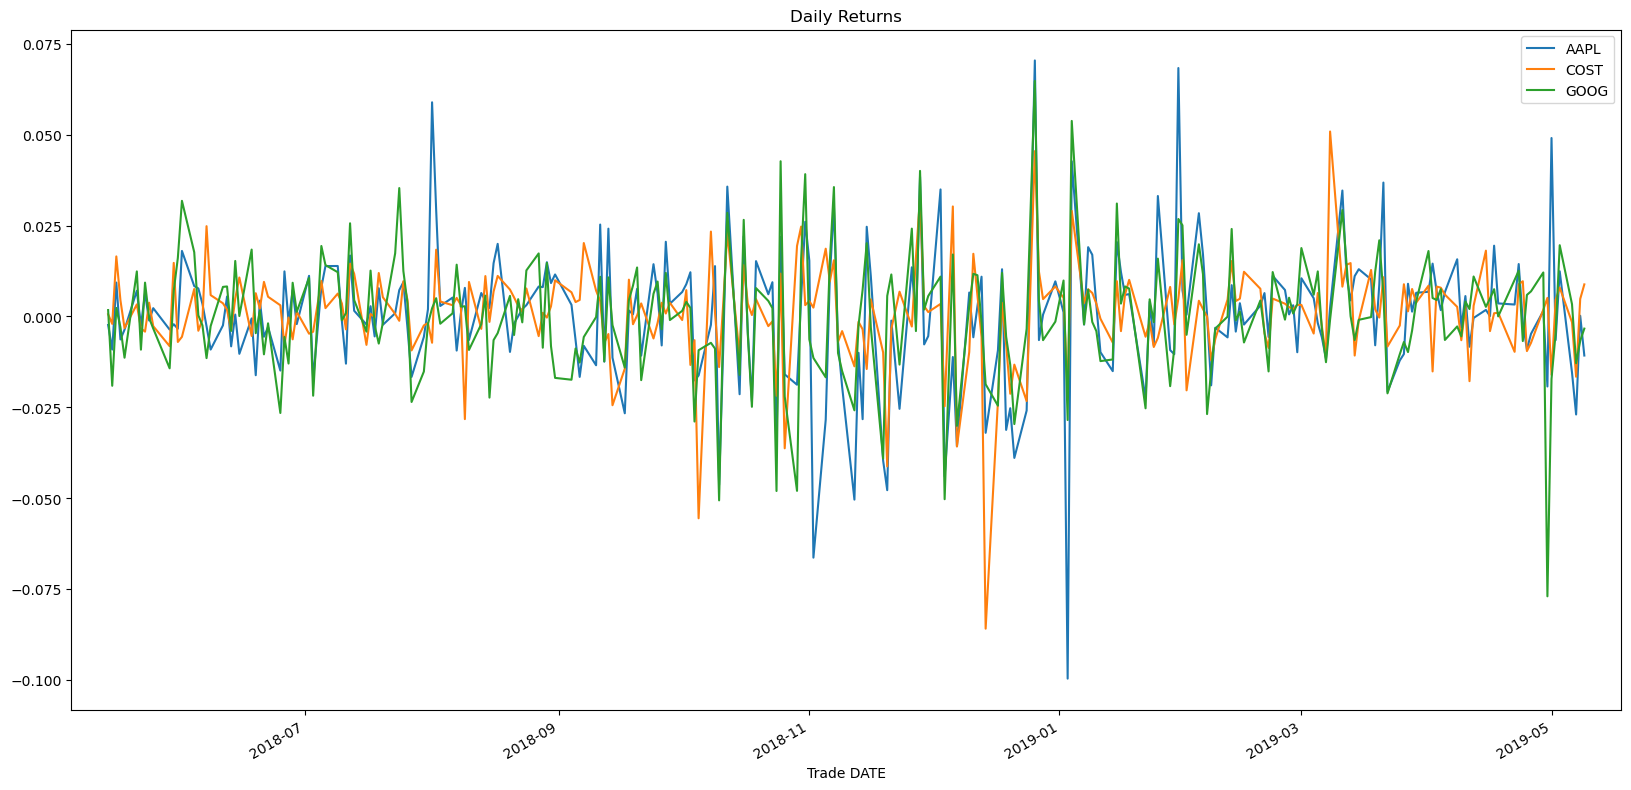

In [255]:
# Display sample data in plot form
combined_daily_returns.plot(figsize=(20,10), title="Daily Returns").margins(x=0.025)

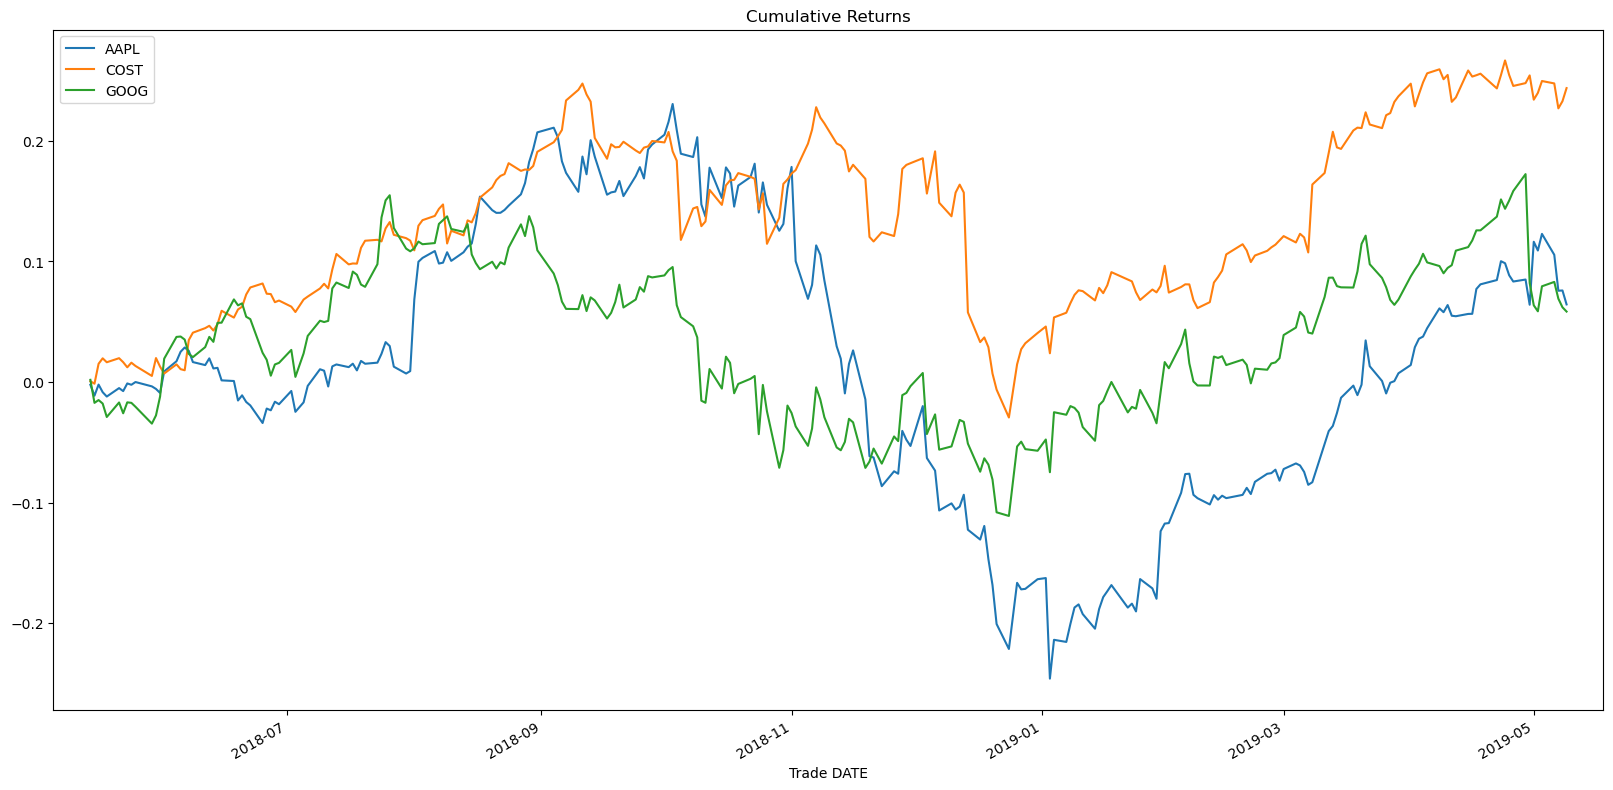

In [256]:
### Calculate cumulative returns of all portfolios
stock_portfolio_cumulative_returns_df = (1 + combined_daily_returns).cumprod() - 1

### Plot cumulative returns
stock_portfolio_cumulative_returns_df.plot(figsize=(20,10), title="Cumulative Returns").margins(x=0.025)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [258]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_daily_returns.dot(weights)

# Display sample data
portfolio_returns.head(10)

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
2018-05-21    0.007600
2018-05-22   -0.004962
2018-05-23    0.003850
2018-05-24    0.000751
2018-05-25   -0.001232
dtype: float64

In [259]:
portfolio_returns.columns = ['Custom Portfolio']

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [260]:
# Join your returns DataFrame to the original returns DataFrame
combinedstocks_df = pd.concat([combinedreturns_df, portfolio_returns], axis='columns',join='inner')

####Rename custom portfolio column from '0' to "Custom Portfolio"
combinedstocks_df.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P TSX', 'Custom Portfolio']

### Check dataframe content
combinedstocks_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [261]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combinedstocks_df = combinedstocks_df.dropna()

In [262]:
### Display sample data
combinedstocks_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


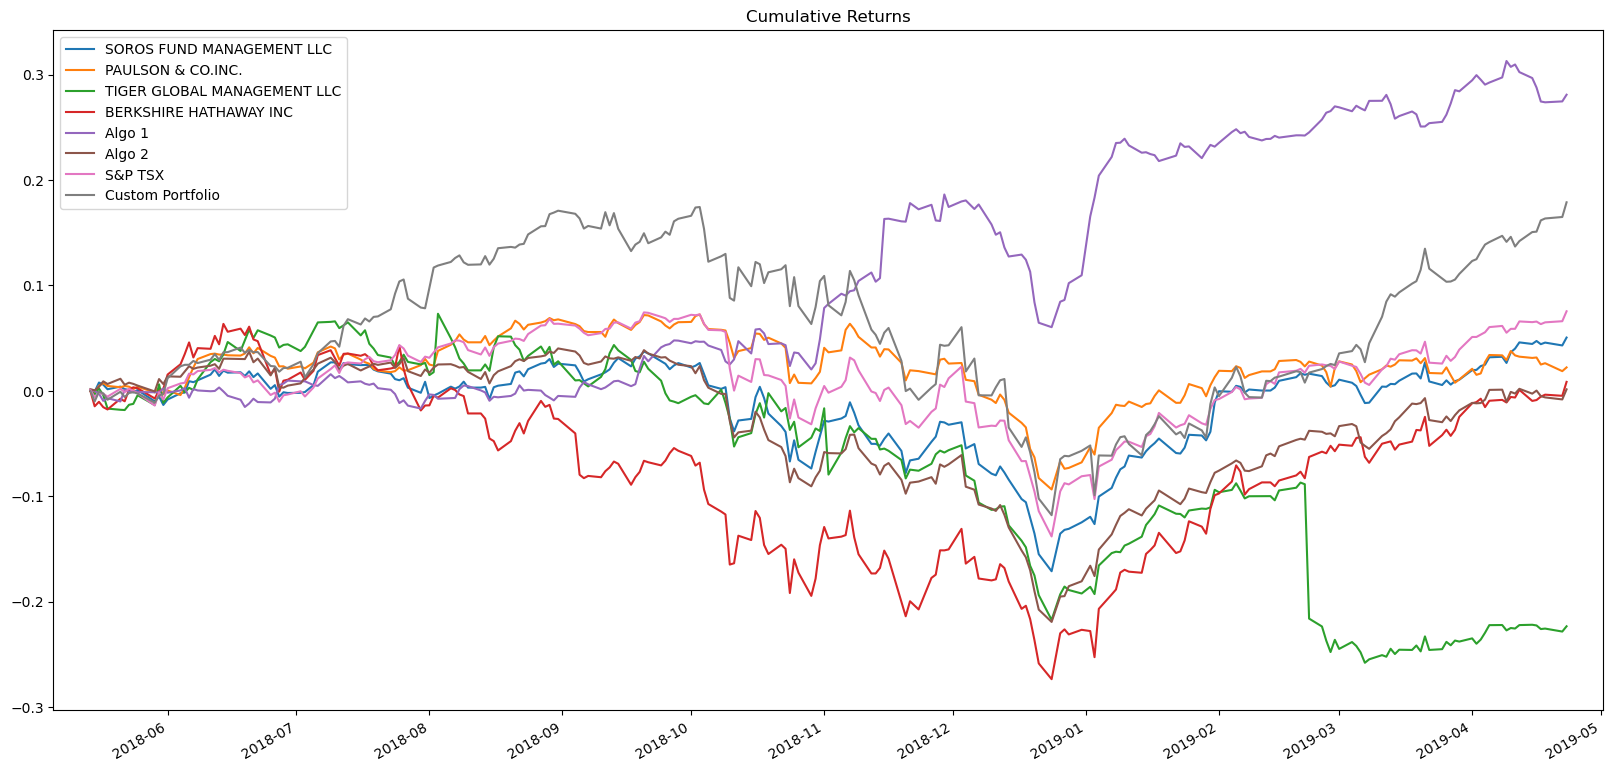

In [263]:
### Checking the cumulative return of the porfolio

### Calculate the cumulative returns of the portfolio
stock_portfolio_cumulative_returns_df = (1 + combinedstocks_df).cumprod() - 1

### Plot the cumulative returns
stock_portfolio_cumulative_returns_df.plot(figsize=(20,10), title="Cumulative Returns").margins(x=0.025)



## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [266]:
# Calculate the annualized `std`
combinedstocks_daily_std = combinedstocks_df.std()

### Calculate the annualized standard deviation (252 trading days)
annualized_std_with_portfolio_df = combinedstocks_daily_std * np.sqrt(252)

## Display dataframe content
annualized_std_with_portfolio_df

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P TSX                        0.152054
Custom Portfolio               0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

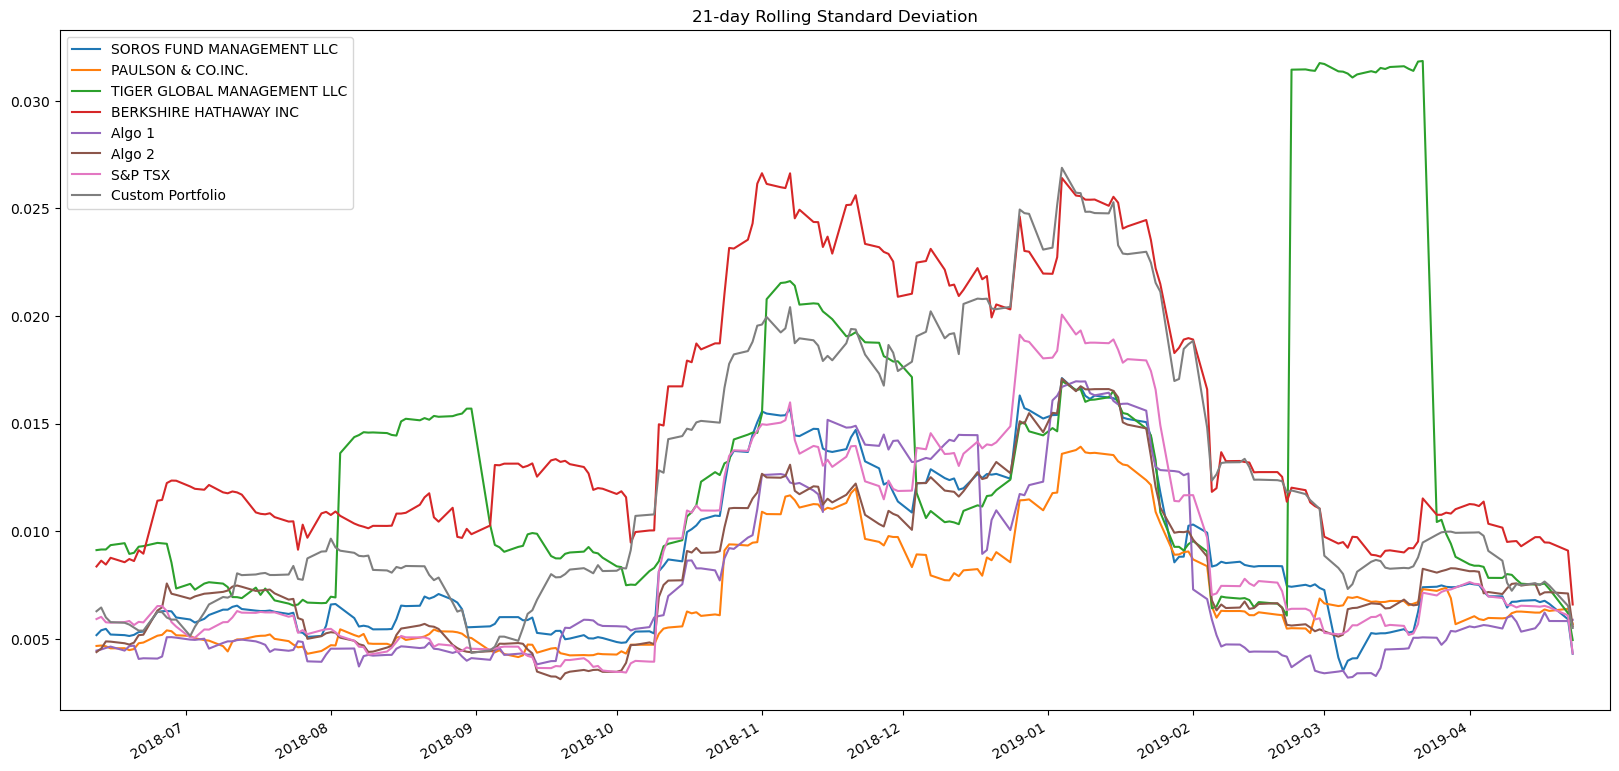

In [272]:
# Calculate rolling standard deviation
rolling_21_std_with_portfolio_df = combinedstocks_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_21_std_with_portfolio_df.plot(figsize=(20,10), title="21-day Rolling Standard Deviation").margins(x=0.025)

### Calculate and plot the correlation

<Axes: >

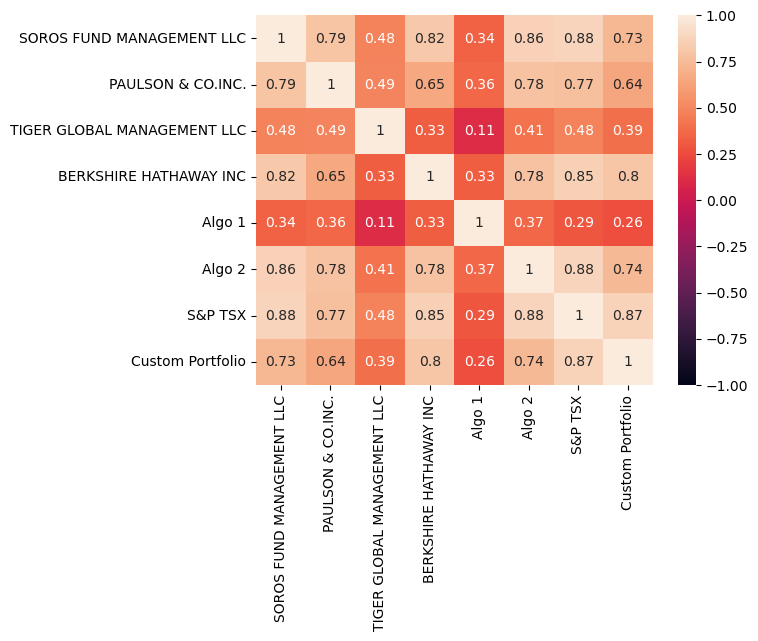

In [274]:
# Calculate and plot the correlation
### previus code use annualized_std of entired combined stock (combinedstocks_annualized_std) which was incorect
correlation_combinedstocks_df = combinedstocks_df.corr()
sns.heatmap(correlation_combinedstocks_df, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': '60-Day Rolling Beta of Custom Portfolio compared to the S&P 500'}, xlabel='Date'>

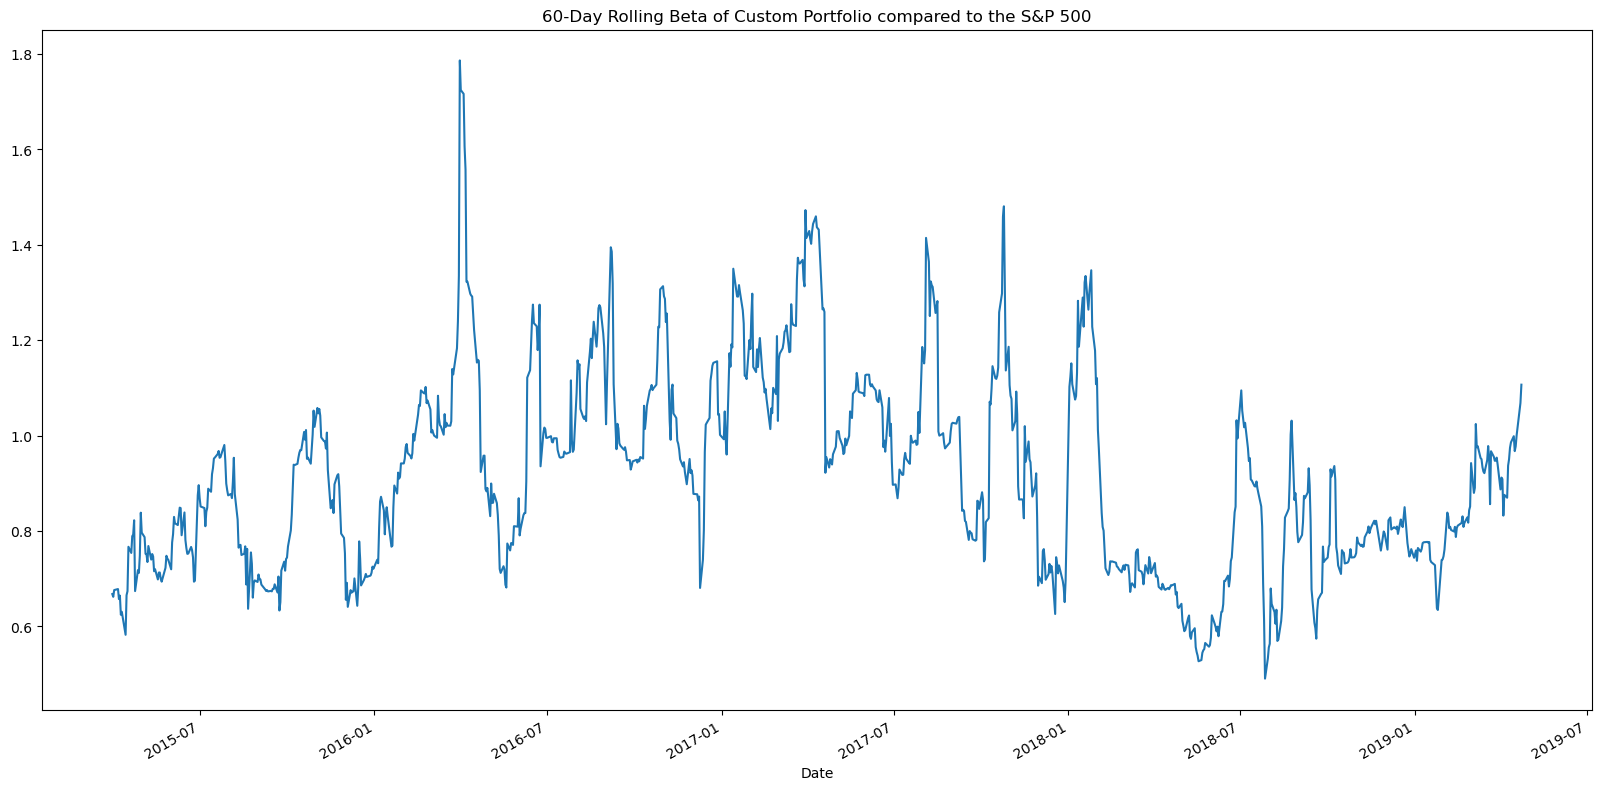

In [279]:
# Calculate and plot Beta
rolling_60_covariance = combinedstocks_df['Custom Portfolio'].rolling(window=60).cov(combinedstocks_df['S&P TSX'])
rolling_60__variance = combinedstocks_df['S&P TSX'].rolling(window=60).var()
rolling_60_beta = rolling_covariance/rolling_variance
rolling_60_beta.plot(figsize=(20,10), title="60-Day Rolling Beta of Custom Portfolio compared to the S&P 500")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [280]:
# Calculate Annualized Sharpe\Ratios
# Annualized Sharpe Ratios
sharpe_ratios = ((combinedstocks_df.mean() * 252)) / (combinedstocks_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P TSX                        0.584820
Custom Portfolio               0.933123
dtype: float64

<Axes: title={'center': 'Sharp Ratios of My Portfolio'}>

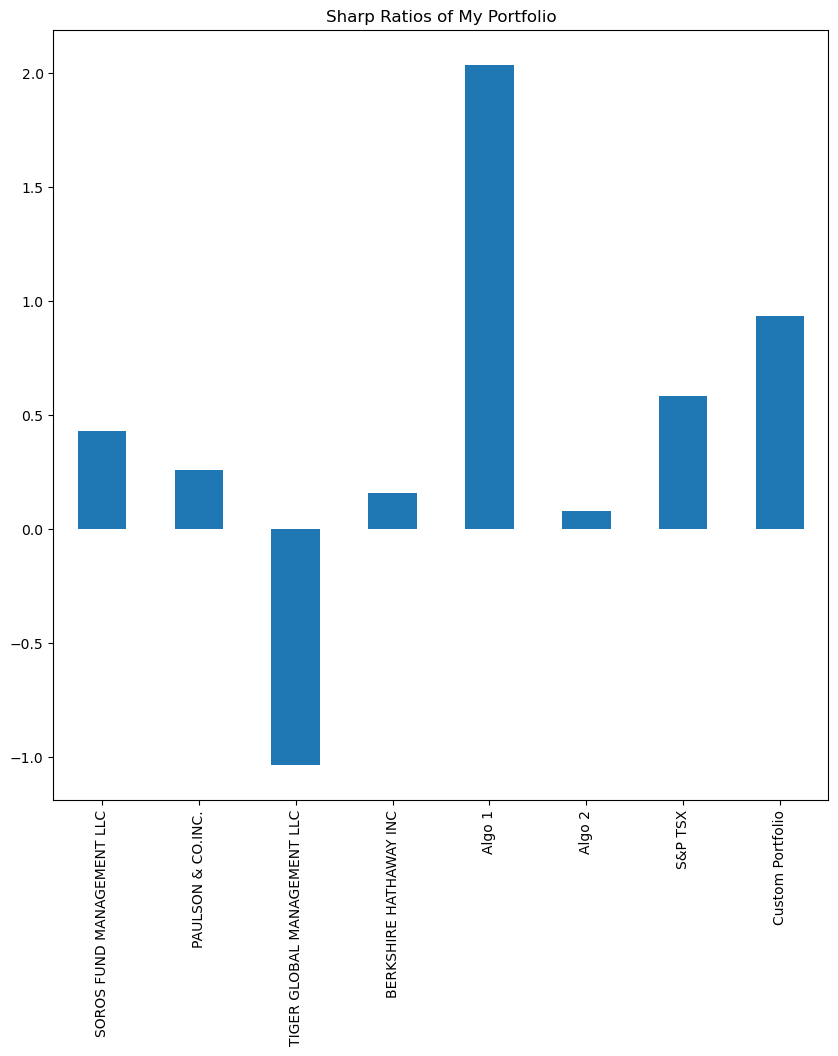

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(10,10),kind='bar', title= "Sharp Ratios of My Portfolio")

### How does your portfolio do?

In [305]:
###old code from previous submission used cumulative_returns_std in loop when comparing to sharp_ratios which was incorrect, replaced with sharpe_ratios which is correct

index = 0
custom_std = sharpe_ratios['Custom Portfolio']
for std in sharpe_ratios:
    if sharpe_ratios.index[index] == 'Custom Portfolio':
        continue
    if std > custom_std:
        print(f"My custom portfolio underpreformed the {sharpe_ratios.index[index]} portfolio")
    elif std < custom_std:
        print(f"My custom portfolio outpreformed the {sharpe_ratios.index[index]} portfolio")
    else:
        print(f"My custom and {sharpe_ratios.index[index]} portfolio preformed equally")
    index += 1

My custom portfolio outpreformed the SOROS FUND MANAGEMENT LLC portfolio
My custom portfolio outpreformed the PAULSON & CO.INC. portfolio
My custom portfolio outpreformed the TIGER GLOBAL MANAGEMENT LLC portfolio
My custom portfolio outpreformed the BERKSHIRE HATHAWAY INC portfolio
My custom portfolio underpreformed the Algo 1 portfolio
My custom portfolio outpreformed the Algo 2 portfolio
My custom portfolio outpreformed the S&P TSX portfolio
